## Poverty model training and prediction data visualizations
This notebook shows how the poverty model can be run using luigi.  
The training data and predicted data are visualized and checked.

In [1]:
import os
os.chdir('../../..')

In [2]:
import json
import pickle
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rioxarray

import luigi
from tensorflow import keras as k
import matplotlib.pyplot as plt

In [3]:
import time
import warnings
warnings.simplefilter(action='ignore')
np.set_printoptions(suppress=True)

## 0. Run
Run full output with desired parameters

In [4]:
from models.poverty_model.model import Output

In [5]:
start = time.time()
task = Output.from_str_params({
    "fgt_a": 0,
    "admin_level": 4,
    "threshold": 0.8,
    "predict_period": "2017-12-01"
})

luigi.build([task], local_scheduler=True)
end = time.time()
print(end - start)

[2021-11-12 18:46:04,146] INFO [luigi:75] logging configured via *.conf file
[2021-11-12 18:46:04,185] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.model.Output_4_0_0_1_0_eac8f89038   has status   PENDING
[2021-11-12 18:46:04,196] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.data.GetAdminFeatures_4___id____ET____ty_2ce81772ff   has status   PENDING
[2021-11-12 18:46:05,089] INFO [luigi-interface:128] Attempting to load from /tmp/data/CkanTarget/data.kimetrica.com/cached_ckan_metadata_kiluigi.pickle
[2021-11-12 18:46:08,028] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.data.ExtractResponse__99914b932b   has status   PENDING
[2021-11-12 18:46:08,032] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.data.PullResponse__99914b932b   has status   DONE
[2021-11-12 18:46:08,055] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.model.A

[2021-11-12 18:46:28,621] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.svdnb.DownloadFile_models_poverty_m_ad2da1eaa7   has status   PENDING
[2021-11-12 18:46:30,271] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.svdnb.MakeCOG_2016_05___id____ET____ty___avg_rade9h___33a15c87cf   has status   PENDING
[2021-11-12 18:46:30,274] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.svdnb.DownloadFile_models_poverty_m_14619d1a77   has status   PENDING
[2021-11-12 18:46:31,915] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.svdnb.MakeCOG_2016_04___id____ET____ty___avg_rade9h___4968d80324   has status   PENDING
[2021-11-12 18:46:31,919] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.svdnb.DownloadFile_models_poverty_m_f0d94a4804   has status   PENDING
[2021-11-12 18:46:33,516] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.svdnb.MakeCOG_

[2021-11-12 18:46:44,259] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_ce5de129b6   has status   PENDING
[2021-11-12 18:46:44,261] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_1389d44d54   has status   PENDING
[2021-11-12 18:46:45,364] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.MakeCOG_2016_08___id____ET____ty___Evap_tavg____Q_07843e7fa5   has status   PENDING
[2021-11-12 18:46:45,367] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_272adf6431   has status   PENDING
[2021-11-12 18:46:45,371] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_faf8bcaecb   has status   PENDING
[2021-11-12 18:46:45,374] INFO [luigi-interface:587] Informed 

[2021-11-12 18:46:49,909] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_b045107160   has status   PENDING
[2021-11-12 18:46:49,913] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_9f8ef6b6ef   has status   PENDING
[2021-11-12 18:46:49,916] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_336d521190   has status   PENDING
[2021-11-12 18:46:51,041] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.MakeCOG_2016_03___id____ET____ty___Evap_tavg____Q_744cbeafe1   has status   PENDING
[2021-11-12 18:46:51,043] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_e68bd89ffc   has status   PENDING
[2021-11-12 18:46:51,047] INFO [luigi-interface:587] Informed 

[2021-11-12 18:46:59,444] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_06e6f76c7f   has status   PENDING
[2021-11-12 18:46:59,447] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_9d8fd065e4   has status   PENDING
[2021-11-12 18:47:00,542] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.MakeCOG_2011_11___id____ET____ty___Evap_tavg____Q_471975e34b   has status   PENDING
[2021-11-12 18:47:00,548] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_fb5e252796   has status   PENDING
[2021-11-12 18:47:00,553] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_d3ff57c6f9   has status   PENDING
[2021-11-12 18:47:00,559] INFO [luigi-interface:587] Informed 

[2021-11-12 18:47:05,075] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_5dfc6c0d45   has status   PENDING
[2021-11-12 18:47:05,080] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_9a55cf2143   has status   PENDING
[2021-11-12 18:47:05,085] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_1759b38710   has status   PENDING
[2021-11-12 18:47:06,155] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.MakeCOG_2011_06___id____ET____ty___Evap_tavg____Q_793e284f11   has status   PENDING
[2021-11-12 18:47:06,159] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_ce42ff9a2b   has status   PENDING
[2021-11-12 18:47:06,162] INFO [luigi-interface:587] Informed 

[2021-11-12 18:47:13,610] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_f6a72182a9   has status   PENDING
[2021-11-12 18:47:13,614] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_f4caa3fe3c   has status   PENDING
[2021-11-12 18:47:13,618] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_bfd85f8a81   has status   PENDING
[2021-11-12 18:47:13,622] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_cb158a53e9   has status   PENDING
[2021-11-12 18:47:14,730] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.MakeCOG_2011_01___id____ET____ty___Evap_tavg____Q_5d399deac2   has status   PENDING
[2021-11-12 18:47:14,733] INFO [luigi-interface:587] Informed 

[2021-11-12 18:48:15,204] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.landscan.DownloadFile_models_poverty_m_https___data_kim_442ba2fc71   has status   DONE
[2021-11-12 18:48:15,212] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.landscan.MakeCOG(interval=2017, variables=["lspop"], location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]})
[2021-11-12 18:49:15,992] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.landscan.MakeCOG(interval=2017, variables=["lspop"], location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]})
[2021-11-12 18:49:15,996] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.landscan.MakeCOG_2017___id____ET____ty___lspop___52b74e648b   has statu

[2021-11-12 18:50:02,249] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2017/12, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2017%2FFLDAS_NOAH01_C_GL_MA.ANOM201712.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201712.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Rainf_f_tavg)
[2021-11-12 18:50:04,812] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2017/12, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&S

[2021-11-12 19:19:25,532] INFO [cdsapi:466] Download rate 1.3M/s


[2021-11-12 19:19:25,932] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.esacci.DownloadFile(prefix=models/poverty_model/data/geo_data/ESACCI/2017, request={"variable": "all", "format": "zip", "year": "2017", "version": "v2.1.1"})
[2021-11-12 19:19:25,939] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.esacci.DownloadFile_models_poverty_m___variable____al_44b9fb368a   has status   DONE
[2021-11-12 19:19:25,963] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.esacci.MakeCOG(interval=2017, variables=["lc"], location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]})
[2021-11-12 19:23:35,566] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.c

[2021-11-12 19:38:17,520] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.svdnb.MakeCOG(interval=2016-11, variables=["avg_rade9h"], location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]})
[2021-11-12 19:38:49,617] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.svdnb.MakeCOG(interval=2016-11, variables=["avg_rade9h"], location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]})
[2021-11-12 19:38:49,624] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.svdnb.MakeCOG_2016_11___id____ET____ty___avg_rade9h___80ecf891f8   has status   DONE
[2021-11-12 19:38:49,635] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   util

[2021-11-12 19:42:39,257] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.svdnb.DownloadFile(prefix=models/poverty_model/data/geo_data/SVDNB/2016/05)
[2021-11-12 19:42:52,325] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.svdnb.DownloadFile(prefix=models/poverty_model/data/geo_data/SVDNB/2016/05)
[2021-11-12 19:42:52,331] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.svdnb.DownloadFile_models_poverty_m_14619d1a77   has status   DONE
[2021-11-12 19:42:52,345] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.svdnb.MakeCOG(interval=2016-05, variables=["avg_rade9h"], location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]})
[2021

[2021-11-12 19:46:23,257] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_ae40d6ec64   has status   DONE
[2021-11-12 19:46:23,265] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/12, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201612.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201612.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi100_200cm_tavg)
[2021-11-12 19:46:26,982] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fld

[2021-11-12 19:46:40,805] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_97394dbb86   has status   DONE
[2021-11-12 19:46:40,813] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/12, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201612.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201612.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi40_100cm_tavg)
[2021-11-12 19:46:43,365] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.flda

[2021-11-12 19:46:57,370] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_bbcf01ed3f   has status   DONE
[2021-11-12 19:46:57,379] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/11, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201611.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201611.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi10_40cm_tavg)
[2021-11-12 19:46:59,921] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas

[2021-11-12 19:47:15,950] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_2057b40e5d   has status   DONE
[2021-11-12 19:47:15,959] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/10, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201610.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201610.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi40_100cm_tavg)
[2021-11-12 19:47:19,018] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.flda

[2021-11-12 19:47:32,802] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_5bc9b6057b   has status   DONE
[2021-11-12 19:47:32,812] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/10, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201610.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201610.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Tair_f_tavg)
[2021-11-12 19:47:36,143] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.Downloa

[2021-11-12 19:47:51,345] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_6b900b3a1a   has status   DONE
[2021-11-12 19:47:51,358] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/09, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201609.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201609.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi00_10cm_tavg)
[2021-11-12 19:47:54,040] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas

[2021-11-12 19:48:09,714] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_6f8fdf9e0b   has status   DONE
[2021-11-12 19:48:09,723] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/08, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201608.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201608.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Rainf_f_tavg)
[2021-11-12 19:48:12,242] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.Downlo

[2021-11-12 19:48:27,730] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_2f9a64169c   has status   DONE
[2021-11-12 19:48:27,739] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/08, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201608.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201608.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi00_10cm_tavg)
[2021-11-12 19:48:32,382] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas

[2021-11-12 19:48:48,472] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_60acbb8cb9   has status   DONE
[2021-11-12 19:48:48,480] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/07, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201607.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201607.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Rainf_f_tavg)
[2021-11-12 19:48:51,025] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.Downlo

[2021-11-12 19:49:09,810] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_b0df0783d7   has status   DONE
[2021-11-12 19:49:09,819] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/06, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201606.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201606.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi40_100cm_tavg)
[2021-11-12 19:49:12,450] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.flda

[2021-11-12 19:49:29,027] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_f8420322d3   has status   DONE
[2021-11-12 19:49:29,034] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/06, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201606.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201606.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Tair_f_tavg)
[2021-11-12 19:49:31,579] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.Downloa

[2021-11-12 19:49:47,508] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_8a17529eeb   has status   DONE
[2021-11-12 19:49:47,516] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/05, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201605.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201605.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Qtotal_tavg)
[2021-11-12 19:49:50,797] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.Downloa

[2021-11-12 19:50:08,460] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_336d521190   has status   DONE
[2021-11-12 19:50:08,469] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/04, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201604.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201604.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi00_10cm_tavg)
[2021-11-12 19:50:11,668] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas

[2021-11-12 19:50:28,899] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_b045107160   has status   DONE
[2021-11-12 19:50:28,907] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/04, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201604.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201604.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi10_40cm_tavg)
[2021-11-12 19:50:31,438] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas

[2021-11-12 19:50:47,098] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_02675632cf   has status   DONE
[2021-11-12 19:50:47,107] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/03, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201603.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201603.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi100_200cm_tavg)
[2021-11-12 19:50:49,972] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fld

[2021-11-12 19:51:08,424] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_7efe659301   has status   DONE
[2021-11-12 19:51:08,431] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/02, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201602.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201602.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi40_100cm_tavg)
[2021-11-12 19:51:10,981] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.flda

[2021-11-12 19:51:26,810] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_e56a45f2a0   has status   DONE
[2021-11-12 19:51:26,818] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/02, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201602.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201602.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Rainf_f_tavg)
[2021-11-12 19:51:29,344] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.Downlo

[2021-11-12 19:51:44,444] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_028b951d35   has status   DONE
[2021-11-12 19:51:44,452] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2016/01, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2016%2FFLDAS_NOAH01_C_GL_MA.ANOM201601.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201601.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Rainf_f_tavg)
[2021-11-12 19:51:48,837] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.Downlo

[2021-11-12 20:14:44,126] INFO [cdsapi:466] Download rate 1.6M/s


[2021-11-12 20:14:44,822] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.esacci.DownloadFile(prefix=models/poverty_model/data/geo_data/ESACCI/2016, request={"variable": "all", "format": "zip", "year": "2016", "version": "v2.1.1"})
[2021-11-12 20:14:44,830] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.esacci.DownloadFile_models_poverty_m___variable____al_359fe7ec04   has status   DONE
[2021-11-12 20:14:44,841] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.esacci.MakeCOG(interval=2016, variables=["lc"], location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]})
[2021-11-12 20:19:16,622] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.c

[2021-11-12 20:34:40,241] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_06e6f76c7f   has status   DONE
[2021-11-12 20:34:40,251] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/12, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201112.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201112.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi100_200cm_tavg)
[2021-11-12 20:34:42,795] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fld

[2021-11-12 20:34:56,579] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_ff6154ff5e   has status   DONE
[2021-11-12 20:34:56,589] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/12, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201112.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201112.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi40_100cm_tavg)
[2021-11-12 20:34:59,421] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.flda

[2021-11-12 20:35:15,082] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_fb5e252796   has status   DONE
[2021-11-12 20:35:15,091] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/11, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201111.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201111.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi00_10cm_tavg)
[2021-11-12 20:35:17,791] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas

[2021-11-12 20:35:35,278] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_cad73eed31   has status   DONE
[2021-11-12 20:35:35,287] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/10, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201110.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201110.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi10_40cm_tavg)
[2021-11-12 20:35:37,875] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas

[2021-11-12 20:35:51,755] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_c5233df006   has status   DONE
[2021-11-12 20:35:51,763] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/10, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201110.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201110.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi40_100cm_tavg)
[2021-11-12 20:35:54,313] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.flda

[2021-11-12 20:36:09,998] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_4843f38425   has status   DONE
[2021-11-12 20:36:10,006] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/09, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201109.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201109.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi00_10cm_tavg)
[2021-11-12 20:36:12,516] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas

[2021-11-12 20:36:31,292] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_d3559c0509   has status   DONE
[2021-11-12 20:36:31,300] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/08, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201108.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201108.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi100_200cm_tavg)
[2021-11-12 20:36:35,810] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fld

[2021-11-12 20:36:51,218] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_cb8702427f   has status   DONE
[2021-11-12 20:36:51,225] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/08, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201108.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201108.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi00_10cm_tavg)
[2021-11-12 20:36:53,758] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas

[2021-11-12 20:37:09,476] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_dfa239fc89   has status   DONE
[2021-11-12 20:37:09,488] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/07, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201107.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201107.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Qtotal_tavg)
[2021-11-12 20:37:15,044] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.Downloa

[2021-11-12 20:37:30,052] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_dc5b3b799f   has status   DONE
[2021-11-12 20:37:30,106] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/06, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201106.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201106.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi100_200cm_tavg)
[2021-11-12 20:37:32,780] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fld

[2021-11-12 20:37:49,126] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_ff18d6143f   has status   DONE
[2021-11-12 20:37:49,135] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/06, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201106.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201106.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi40_100cm_tavg)
[2021-11-12 20:37:52,078] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.flda

[2021-11-12 20:38:07,155] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_6ae6b2db8e   has status   DONE
[2021-11-12 20:38:07,165] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/05, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201105.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201105.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi40_100cm_tavg)
[2021-11-12 20:38:10,472] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.flda

[2021-11-12 20:38:27,394] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_dba2aed913   has status   DONE
[2021-11-12 20:38:27,404] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/04, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201104.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201104.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi40_100cm_tavg)
[2021-11-12 20:38:29,939] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.flda

[2021-11-12 20:38:46,559] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_b0f20c0af3   has status   DONE
[2021-11-12 20:38:46,569] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/04, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201104.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201104.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi10_40cm_tavg)
[2021-11-12 20:38:49,285] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas

[2021-11-12 20:39:05,134] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_893e04fe16   has status   DONE
[2021-11-12 20:39:05,144] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/03, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201103.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201103.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi100_200cm_tavg)
[2021-11-12 20:39:07,806] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fld

[2021-11-12 20:39:26,689] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_3f2ed657df   has status   DONE
[2021-11-12 20:39:26,699] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/02, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201102.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201102.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Qtotal_tavg)
[2021-11-12 20:39:29,240] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.Downloa

[2021-11-12 20:39:47,298] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_067a735931   has status   DONE
[2021-11-12 20:39:47,308] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/02, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201102.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201102.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=Tair_f_tavg)
[2021-11-12 20:39:49,852] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.fldas.Downloa

[2021-11-12 20:40:05,415] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.fldas.DownloadFile_models_poverty_m_https___hydro1_g_7894efdbaf   has status   DONE
[2021-11-12 20:40:05,428] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.fldas.DownloadFile(prefix=models/poverty_model/data/geo_data/FLDAS/2011/01, url=https://hydro1.gesdisc.eosdis.nasa.gov/daac-bin/OTF/HTTP_services.cgi?FORMAT=Y29nLw&SHORTNAME=FLDAS_NOAH01_C_GL_MA&SERVICE=L34RS_LDAS&VERSION=1.02&DATASET_VERSION=001&FILENAME=%2Fdata%2FFLDAS%2FFLDAS_NOAH01_C_GL_MA.001%2F2011%2FFLDAS_NOAH01_C_GL_MA.ANOM201101.001.nc&LABEL=FLDAS_NOAH01_C_GL_MA.ANOM201101.001.nc.SUB.tif&BBOX=3.3%2C33.0%2C14.9%2C48.0&VARIABLES=SoilMoi40_100cm_tavg)
[2021-11-12 20:40:08,019] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.flda

[2021-11-12 21:04:36,183] INFO [cdsapi:466] Download rate 1.5M/s


[2021-11-12 21:04:36,543] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      utils.cog_tasks.esacci.DownloadFile(prefix=models/poverty_model/data/geo_data/ESACCI/2011, request={"variable": "all", "format": "zip", "year": "2011", "version": "v2.0.7cds"})
[2021-11-12 21:04:36,550] INFO [luigi-interface:587] Informed scheduler that task   utils.cog_tasks.esacci.DownloadFile_models_poverty_m___variable____al_c3723fcfe6   has status   DONE
[2021-11-12 21:04:36,558] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   utils.cog_tasks.esacci.MakeCOG(interval=2011, variables=["lc"], location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]})
[2021-11-12 21:08:56,163] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      util

[2021-11-12 21:25:30,380] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) done      models.poverty_model.data.GuessResponsePixels(train_location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]}, admin_level=4, fgt_a=1.0, train_years=[2011, 2016], seed=8888)
[2021-11-12 21:25:30,387] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.data.GuessResponsePixels_4_1_0_8888_44a445f9a3   has status   DONE
[2021-11-12 21:25:30,393] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   models.poverty_model.data.GetTrainingData(train_location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]}, admin_level=4, fgt_a=1.0, train_years=[2011, 2016], seed=8888)
[2021-11-12 21:26:40,144] INFO [luigi-interface:208] [pid 676] Worker Worker(salt=233423198, worke

[2021-11-12 21:27:17,796] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.model.Train_4_1_0_8888_44a445f9a3   has status   DONE
[2021-11-12 21:27:17,803] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=233423198, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   models.poverty_model.model.Predict(train_location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]}, admin_level=4, location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33.0, 3.3, 48.0, 14.9]}, period=2017-12-01, predictors={"esacci": ["lc"], "fldas": ["Evap_tavg", "Qtotal_tavg", "Rainf_f_tavg", "SoilMoi00_10cm_tavg", "SoilMoi10_40cm_tavg", "SoilMoi40_100cm_tavg", "SoilMoi100_200cm_tavg", "Tair_f_tavg"], "svdnb": ["avg_rade9h"], "landscan": ["lspop"]}, reference_grid=landscan, fgt_a=1.0, train_years=[2011, 2016], seed=8888, threshold=0.8, fldas=1.0, svdnb=1.0)
[2021-11-12 21:28:56,889] INFO [luigi-interface:208] [pid 676] Work

In [8]:
start = time.time()
task1 = Output.from_str_params({
    "fgt_a": 1,
    "admin_level": 4,
    "threshold": 0.8,
    "predict_period": "2017-12-01"
})

luigi.build([task1], local_scheduler=True)
end = time.time()
print(end - start)

[2021-11-12 22:35:31,244] INFO [luigi:58] logging already configured
[2021-11-12 22:35:31,274] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.model.Output_4_1_0_1_0_c6929d9204   has status   PENDING
[2021-11-12 22:35:31,278] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.data.GetAdminFeatures_4___id____ET____ty_2ce81772ff   has status   DONE
[2021-11-12 22:35:31,282] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.model.Aggregate_4_1_0_1_0_408e9fcc33   has status   DONE
[2021-11-12 22:35:31,286] INFO [luigi-interface:172] Done scheduling tasks
[2021-11-12 22:35:31,292] INFO [luigi-interface:1175] Running Worker with 1 processes
[2021-11-12 22:35:31,306] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=939021968, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   models.poverty_model.model.Output(train_location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33

## 1. Check training data
Check original y0, ya values

In [4]:
from models.poverty_model.model import GetTrainingData

In [5]:
with open(GetTrainingData().output().path,'rb') as f:
    ds = pickle.load(f)

### Maps
#### Raw data

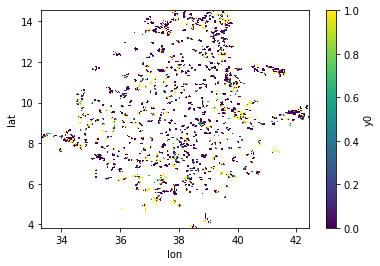

In [6]:
# 2011 y0
ds1 = ds.drop('var')
ds1 = ds1.isel(period = range(12))
ds1 = ds1.mean(dim='period')
ds1 = ds1.unstack('location')

profile = {
        "driver": "GTiff",
        "count": 1,
        "width": ds1.lon.size,
        "height": ds1.lat.size,
        "crs": '+init=epsg:4326',
        "transform": (0.0083333333333333,
                     0.0,
                     32.99999999999915,
                     0.0,
                     -0.0083333333333333,
                     14.90833333333292),
        "dtype": np.dtype("float"),
        "tiled": True,
        "compress": "deflate",
    }

ds1.y0.plot()

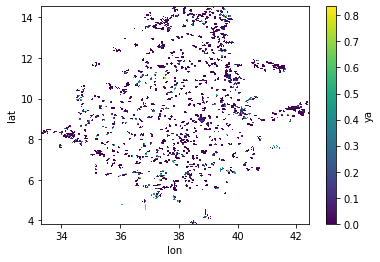

In [12]:
# 2011 ya
ds1 = ds.drop('var')
ds1 = ds1.isel(period = range(12))
ds1 = ds1.mean(dim='period')
ds1 = ds1.unstack('location')
    
ds1.ya.plot()

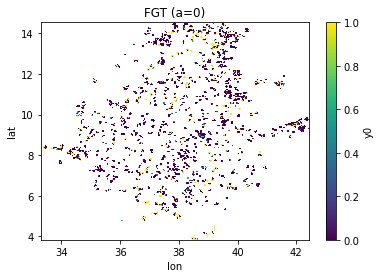

In [7]:
# 2016 y0
ds1 = ds.drop('var')
ds1 = ds1.isel(period = range(12, 24))
ds1 = ds1.mean(dim='period')
ds1 = ds1.unstack('location')
#ds1.y0.plot()

fig, axes = plt.subplots()
ds1.y0.plot(ax=axes)
axes.set_title("FGT (a=0)")
fig.savefig('./models/poverty_model/www/fgt_0_train.jpg')

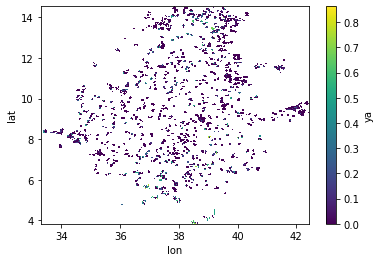

In [14]:
# 2016 ya
ds1 = ds.drop('var')
ds1 = ds1.isel(period = range(12, 24))
ds1 = ds1.mean(dim='period')
ds1 = ds1.unstack('location')
    
ds1.ya.plot()

#### Histograms

In [78]:
with open(GetTrainingData().output().path,'rb') as f:
    ds = pickle.load(f)

In [79]:
ds["location"] = np.arange(ds.sizes["location"])
ds = (
    ds.stack(sample=["period", "location"])
    .dropna("sample", subset=["y0", "ya"])
    .transpose("sample", "var")
)
ds = ds.dropna(dim='sample')

y0 = ds["y0"].load().data
ya = ds["ya"].load().data

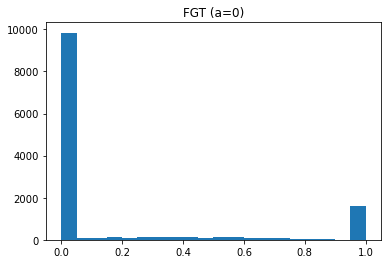

In [81]:
### y0 
### 0 means everyone not poor, 1 means everyone poor, decimal is mix
plt.hist(y0, bins=20)
plt.title('FGT (a=0)')
plt.savefig('./models/poverty_model/www/hist.jpg')

(array([10467.,   466.,   376.,   319.,   255.,   224.,   183.,   131.,
          116.,   103.,   110.,    82.,    68.,    53.,    30.,    16.,
           20.,     9.,     4.,     2.]),
 array([0.        , 0.04311937, 0.08623875, 0.12935812, 0.17247749,
        0.21559687, 0.25871624, 0.30183561, 0.34495499, 0.38807436,
        0.43119373, 0.47431311, 0.51743248, 0.56055185, 0.60367123,
        0.6467906 , 0.68990997, 0.73302935, 0.77614872, 0.81926809,
        0.86238747]),
 <BarContainer object of 20 artists>)

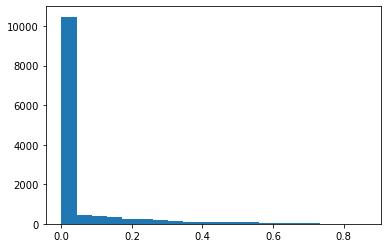

In [18]:
### ya 
### where fgt-a == 1
plt.hist(ya, bins=20)

## 2. Check predicted values

In [19]:
from models.poverty_model.model import Train, GetPredictors

In [21]:
model = k.models.load_model(Train().output()['model'].path)
with open(Train().output()['pca'].path, 'rb') as f:
    pca = pickle.load(f)
with open(Train().output()['yeo'].path, 'rb') as f:
    yeo = pickle.load(f)
with open(GetPredictors(period='2017-12-01').output().path, 'rb')as f:
    ds = pickle.load(f)
ds = xr.concat([d for d in ds.values()], "var")    

In [23]:
# predict
ds = ds.stack(location=["lat", "lon"])
loc = ~ds.isnull().any("var").load()
ds = ds.sel(location=loc).transpose("location", "var")

num = ds.drop_sel(var=("esacci",)).load().data
num_pow = yeo.transform(num)
cat = ds.sel(var=("esacci",)).load().data
cat = pca.transform(cat)

# run model
clsn, rgrn = model.predict([num, num_pow, cat])

### No 0-inflating

(array([277639.,  41302.,  29992.,  26484.,  24442.,  21174.,  19125.,
         17961.,  19977.,  27586.,  41011., 130378., 297336., 480657.,
        405683., 279062., 106519.,  34041.,   3218.,    161.]),
 array([0.        , 0.01400672, 0.02801344, 0.04202016, 0.05602689,
        0.07003361, 0.08404033, 0.09804706, 0.11205377, 0.1260605 ,
        0.14006722, 0.15407394, 0.16808066, 0.18208739, 0.19609411,
        0.21010083, 0.22410755, 0.23811427, 0.252121  , 0.2661277 ,
        0.28013444], dtype=float32),
 <BarContainer object of 20 artists>)

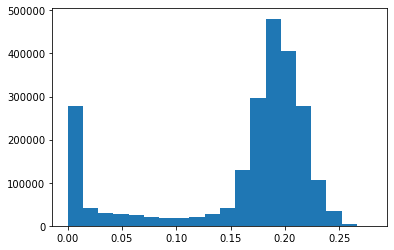

In [24]:
### y0 pred before 0-inflating
plt.hist(rgrn[:, 0], bins=20)

(array([507472.,  52715.,  61537., 194932., 467312., 360998., 322018.,
        238704.,  73881.,   2006.,    842.,    524.,    343.,    188.,
           129.,     63.,     43.,     24.,      9.,      8.]),
 array([0.        , 0.00399528, 0.00799057, 0.01198585, 0.01598113,
        0.01997641, 0.0239717 , 0.02796698, 0.03196226, 0.03595755,
        0.03995283, 0.04394811, 0.04794339, 0.05193868, 0.05593396,
        0.05992924, 0.06392453, 0.06791981, 0.07191509, 0.07591037,
        0.07990566], dtype=float32),
 <BarContainer object of 20 artists>)

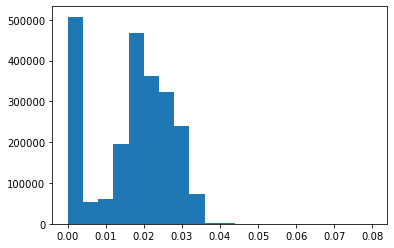

In [25]:
# ya pred before 0-inflating
plt.hist(rgrn[:, 1], bins=20)

### 0 inflated (final) pred results
There are too many predicted to be poor (unlikely), so we 0 inflate the final results

In [26]:
# zero-inflate the regression output
clsn[:, 0] = np.where(clsn[:, 0] < 0.7, 0, clsn[:, 0])
clsn = clsn.argmax(axis=1)
rgrn[:, 0] = np.where(clsn == 0, 0, rgrn[:, 0])
rgrn[:, 0] = np.where(clsn == 2, 1, rgrn[:, 0])
rgrn[:, 1] = np.where(clsn == 0, 0, rgrn[:, 1])
ds = xr.DataArray(
    np.empty((loc.size, 2)),
    coords=loc.coords,
    dims=("location", "a"),
    attrs={k: ds.attrs[k] for k in ["crs", "transform"]},
)
ds[~loc] = np.nan
ds[loc] = rgrn
ds = ds.unstack("location")

# write output to separate geotiffs
profile = {
    "driver": "GTiff",
    "count": 1,
    "width": ds.sizes["lon"],
    "height": ds.sizes["lat"],
    "crs": ds.attrs["crs"],
    "transform": ds.attrs["transform"],
    "dtype": ds.dtype,
    "tiled": True,
    "compress": "deflate",
}

(array([1591225.,       0.,       9.,  210340.,  475772.,    6400.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,       0.,       0.,       0.,
              0.,       2.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
       dtype=float32),
 <BarContainer object of 20 artists>)

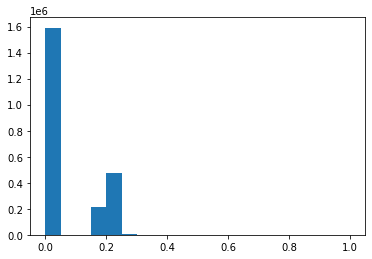

In [27]:
# y0 pred
plt.hist(rgrn[:, 0], bins=20)

(array([1591360.,    7890.,   26002.,   40810.,   78292.,  112100.,
         158765.,  195515.,   70856.,    1126.,     421.,     252.,
            161.,      79.,      60.,      31.,      13.,       7.,
              4.,       4.]),
 array([0.        , 0.00399308, 0.00798617, 0.01197925, 0.01597233,
        0.01996542, 0.0239585 , 0.02795159, 0.03194467, 0.03593775,
        0.03993084, 0.04392392, 0.047917  , 0.05191009, 0.05590317,
        0.05989625, 0.06388934, 0.06788242, 0.07187551, 0.07586858,
        0.07986167], dtype=float32),
 <BarContainer object of 20 artists>)

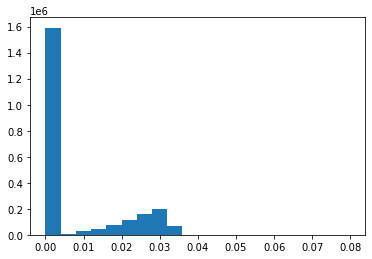

In [28]:
# ya pred
plt.hist(rgrn[:, 1], bins=20)

### Predicted tif files

In [8]:
# from models.poverty_model.model import Predict
### Predict() isn't getting the correct data, using direct filepath 
Predict_path = 'output/intermediate/models/poverty_model/model/Predict_4_1_0_1_0_408e9fcc33/'

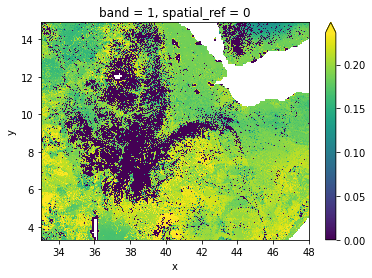

In [35]:
a = rioxarray.open_rasterio(Predict_path + 'fgt_0.tif')
a.plot(robust=True) #this takes out the few high values, so there is more gradation

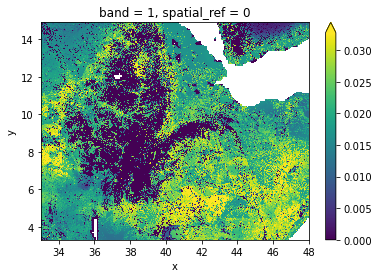

In [36]:
b = rioxarray.open_rasterio(Predict_path + 'fgt_a.tif')
b.plot(robust=True) #this takes out the few high values, so there is more gradation

## 3. Aggregation and comparison to perturbed

### Perturb: FLDAS to x2 values
We imagine a scenario where all the FLDAS bands increase by 2

In [7]:
start = time.time()
task_p = Output.from_str_params({
    "fgt_a": 0,
    "admin_level": 4,
    "threshold": 0.8,
    "predict_period": "2017-12-01",
    "fldas": 2,
    "svdnb": 2
})

luigi.build([task_p], local_scheduler=True)
end = time.time()
print(end - start)

[2021-11-16 18:55:48,017] INFO [luigi:58] logging already configured
[2021-11-16 18:55:48,055] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.model.Output_4_0_0_2_0_0ef3583542   has status   PENDING
[2021-11-16 18:55:48,060] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.data.GetAdminFeatures_4___id____ET____ty_2ce81772ff   has status   DONE
[2021-11-16 18:55:48,098] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.model.Aggregate_4_1_0_2_0_05ae7f505d   has status   PENDING
[2021-11-16 18:55:48,102] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.data.GetPredictors_4___id____ET____ty_2017_12_01_9f1b2e3932   has status   DONE
[2021-11-16 18:55:48,107] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.model.Predict_4_1_0_2_0_05ae7f505d   has status   DONE
[2021-11-16 18:55:48,114] INFO [luigi-interface:172] Done scheduling tasks
[2021-1

In [38]:
task1_p = Output.from_str_params({
    "fgt_a": 1,
    "admin_level": 4,
    "threshold": 0.8,
    "predict_period": "2017-12-01",
    "fldas": 2,
    "svdnb": 2
})

luigi.build([task1_p], local_scheduler=True)

[2021-11-13 02:02:49,857] INFO [luigi:58] logging already configured
[2021-11-13 02:02:49,891] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.model.Output_4_1_0_2_0_cedf6b875e   has status   PENDING
[2021-11-13 02:02:49,894] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.data.GetAdminFeatures_4___id____ET____ty_2ce81772ff   has status   DONE
[2021-11-13 02:02:49,899] INFO [luigi-interface:587] Informed scheduler that task   models.poverty_model.model.Aggregate_4_1_0_2_0_05ae7f505d   has status   DONE
[2021-11-13 02:02:49,903] INFO [luigi-interface:172] Done scheduling tasks
[2021-11-13 02:02:49,906] INFO [luigi-interface:1175] Running Worker with 1 processes
[2021-11-13 02:02:49,919] INFO [luigi-interface:157] [pid 676] Worker Worker(salt=637305419, workers=1, host=61731c07f0ef, username=jovyan, pid=676) running   models.poverty_model.model.Output(train_location={"id": "ET", "type": "Feature", "geometry": null, "bbox": [33

True

### Averaged to admin district

In [59]:
with open(task.output().path, 'rb') as f:
    y0 = json.load(f)
y0 = pd.DataFrame(y0['data'])    
y0.rename(columns={'pred':'y0'}, inplace=True)

with open(task_p.output().path, 'rb') as f:
    y0pert = json.load(f)
y0pert = pd.DataFrame(y0pert['data'])    
y0pert.rename(columns={'pred':'y0pert'}, inplace=True)

In [53]:
from models.poverty_model.data import GetAdminFeatures

In [54]:
gdf = gpd.read_file(GetAdminFeatures().output().path)

#### Y0

In [63]:
# y0
m0 = pd.merge(gdf, y0, on='id', how='left')
m0 = pd.merge(m0, y0pert, on='id', how='left')

(array([11524.,  1512.,   700.,   385.,   286.,   196.,   169.,   129.,
           98.,    79.,    80.,    55.,    42.,    42.,    37.,    44.,
           47.,    15.,     8.,     5.]),
 array([0.        , 0.01195853, 0.02391706, 0.03587558, 0.04783411,
        0.05979264, 0.07175117, 0.08370969, 0.09566822, 0.10762675,
        0.11958528, 0.1315438 , 0.14350233, 0.15546086, 0.16741939,
        0.17937791, 0.19133644, 0.20329497, 0.2152535 , 0.22721202,
        0.23917055]),
 <BarContainer object of 20 artists>)

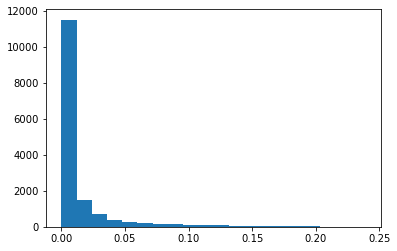

In [61]:
# y0 normal
plt.hist(m0.y0, bins=20)

(array([12019.,  1389.,   597.,   372.,   241.,   166.,   141.,    90.,
           94.,    74.,    58.,    45.,    31.,    34.,    39.,    24.,
           23.,     6.,     3.,     7.]),
 array([0.        , 0.0118627 , 0.02372541, 0.03558811, 0.04745082,
        0.05931352, 0.07117622, 0.08303893, 0.09490163, 0.10676434,
        0.11862704, 0.13048975, 0.14235245, 0.15421515, 0.16607786,
        0.17794056, 0.18980327, 0.20166597, 0.21352867, 0.22539138,
        0.23725408]),
 <BarContainer object of 20 artists>)

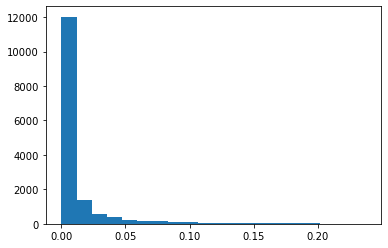

In [64]:
# y0 perturbed
plt.hist(m0.y0pert, bins=20)

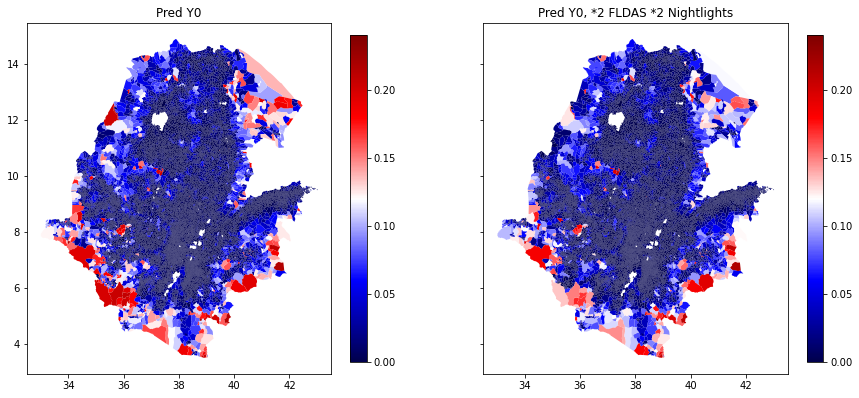

In [66]:
MAX = .24

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(15,15))
m0.plot(ax=ax1, column='y0', cmap='seismic', legend=True, vmax=MAX, legend_kwds={'shrink': 0.4})
m0.plot(ax=ax2, column='y0pert', cmap='seismic', legend=True, vmax=MAX, legend_kwds={'shrink': 0.4})
ax1.title.set_text('Pred Y0')
ax2.title.set_text('Pred Y0, *2 FLDAS *2 Nightlights')

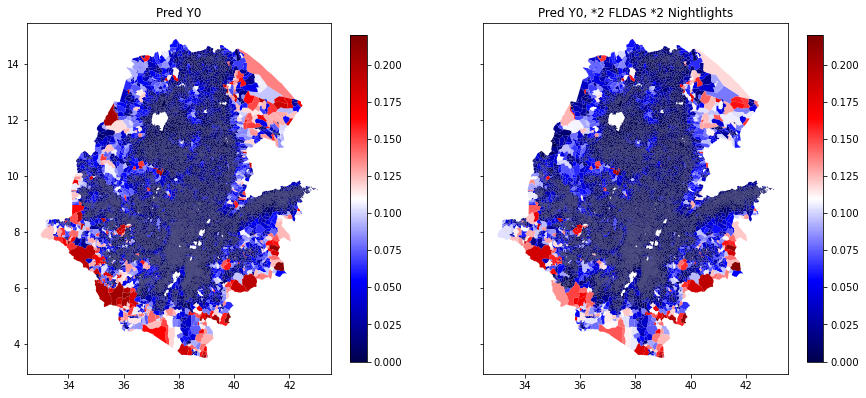

In [67]:
# try a different max for more gradation
MAX = .22

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(15,15))
m0.plot(ax=ax1, column='y0', cmap='seismic', legend=True, vmax=MAX, legend_kwds={'shrink': 0.4})
m0.plot(ax=ax2, column='y0pert', cmap='seismic', legend=True, vmax=MAX, legend_kwds={'shrink': 0.4})
ax1.title.set_text('Pred Y0')
ax2.title.set_text('Pred Y0, *2 FLDAS *2 Nightlights')

#### YA

In [68]:
with open(task1.output().path, 'rb') as f:
    ya = json.load(f)
ya = pd.DataFrame(ya['data'])    
ya.rename(columns={'pred':'ya'}, inplace=True)

with open(task1_p.output().path, 'rb') as f:
    yapert = json.load(f)
yapert = pd.DataFrame(yapert['data'])    
yapert.rename(columns={'pred':'yapert'}, inplace=True)

In [70]:
# y0
ma = pd.merge(gdf, ya, on='id', how='left')
ma = pd.merge(ma, yapert, on='id', how='left')

(array([12953.,  1037.,   464.,   272.,   197.,   144.,    70.,    82.,
           59.,    42.,    22.,    19.,    24.,    12.,    17.,    18.,
           11.,     4.,     0.,     6.]),
 array([0.        , 0.00164104, 0.00328208, 0.00492311, 0.00656415,
        0.00820519, 0.00984623, 0.01148727, 0.0131283 , 0.01476934,
        0.01641038, 0.01805142, 0.01969246, 0.02133349, 0.02297453,
        0.02461557, 0.02625661, 0.02789765, 0.02953869, 0.03117972,
        0.03282076]),
 <BarContainer object of 20 artists>)

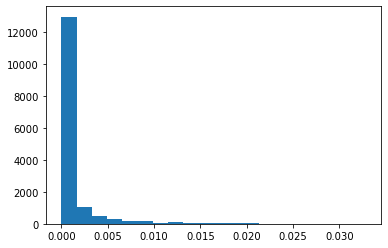

In [71]:
# ya normal
plt.hist(ma.ya, bins=20)

(array([13254.,   960.,   427.,   268.,   143.,   106.,    74.,    62.,
           33.,    27.,    19.,    16.,     7.,    11.,     8.,    15.,
            9.,     6.,     3.,     5.]),
 array([0.        , 0.0016153 , 0.0032306 , 0.00484589, 0.00646119,
        0.00807649, 0.00969179, 0.01130708, 0.01292238, 0.01453768,
        0.01615298, 0.01776828, 0.01938357, 0.02099887, 0.02261417,
        0.02422947, 0.02584476, 0.02746006, 0.02907536, 0.03069066,
        0.03230596]),
 <BarContainer object of 20 artists>)

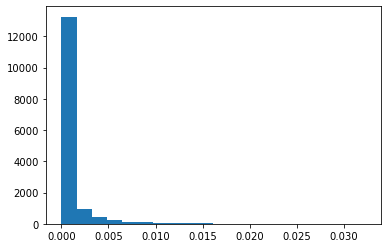

In [72]:
# ya pert
plt.hist(ma.yapert, bins=20)

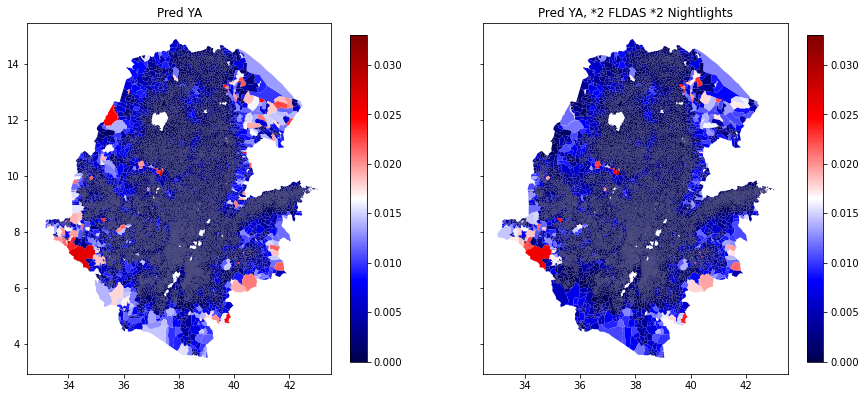

In [73]:
MAX = .033

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(15,15))
ma.plot(ax=ax1, column='ya', cmap='seismic', legend=True, vmax=MAX, legend_kwds={'shrink': 0.4})
ma.plot(ax=ax2, column='yapert', cmap='seismic', legend=True, vmax=MAX, legend_kwds={'shrink': 0.4})
ax1.title.set_text('Pred YA')
ax2.title.set_text('Pred YA, *2 FLDAS *2 Nightlights')